# ANN

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('MLP_regresion.csv')
data.head()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


In [2]:
X = np.array(data['X'])   #feature
Y = np.array(data['Y'])

In [3]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

(0.0, 0.1)

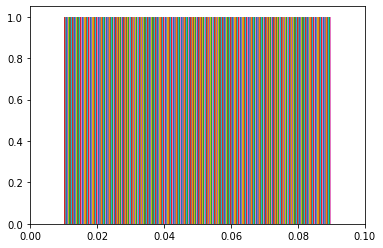

In [4]:
# le aplico el standard scaler a X
X_scaled = scaler.fit_transform([X])

# distribucion de feature
import matplotlib.pyplot as plt
plt.hist(X_scaled)
plt.xlim(0,0.1)

In [5]:
import numpy as np
np.shape(X_scaled)  # vector fila

(1, 1000)

In [6]:
# convierto X_scaled a vector columna
X_scaled = X_scaled.T
np.shape(X_scaled)

(1000, 1)

In [7]:
# dividiendo entre training y test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=40)

In [8]:
# modelo 1 de ANN
import torch
from torch.autograd import Variable

input_dim = 1     #  solo hay 1 feature
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 40),   # 20 neuronas en primer layer
                torch.nn.ReLU(),     # funcion de activacion
                torch.nn.Linear(40, 20),   # segunda layer
                torch.nn.ReLU(),
                torch.nn.Linear(20, 60),   # tercera layer
                torch.nn.ReLU(),
                torch.nn.Linear(60, 20),   # cuarta layer
                torch.nn.ReLU(),
                torch.nn.Linear(20, input_dim),   # quinta layer
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=20, bias=True)
  (7): ReLU()
  (8): Linear(in_features=20, out_features=1, bias=True)
)

In [9]:
# optimizador y criterio de evaluacion.
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)  # rata de aprendizaje lr.   # actualiza los pesos
criteria = torch.nn.MSELoss() #  Ya que es un problema de regresion, usaré el criterio de error minimo cuadrado

In [10]:
# tranformo np arrays a tensores
X_train_tensor = Variable(torch.from_numpy(X_train)).float()
X_train_tensor = torch.unsqueeze(X_train_tensor,dim=1)
X_test_tensor = Variable(torch.from_numpy(X_test)).float()
Y_train_tensor = Variable(torch.from_numpy(Y_train)).float()
Y_test_tensor  = Variable(torch.from_numpy(Y_test)).float()

In [11]:
# entro mi ANN
n_epoch = 50
loss_list = []    # lista de errores por cada epoca
accuracy_list = []

for epoch in range(n_epoch):
  Y_pred = model(X_train_tensor)   # prediccion
  loss = criteria(Y_pred, Y_train_tensor)   # calcula el error
  loss_list.append(loss)

  optimizer.zero_grad()   # borre los pesos anteriores
  loss.backward()       # actualiza pesos con optimizadores de esta epoca
  optimizer.step()     # aplique los pesos 

  correct = (torch.argmax(Y_pred, dim=1) == Y_train_tensor).type(torch.FloatTensor) # accuracy
  accuracy_list.append(correct.mean())

  print('Epoch [{}/{}], loss: {}, acc: {}'.format(epoch+1,n_epoch,loss_list[epoch],accuracy_list[epoch]))

Epoch [1/50], loss: 0.6479961276054382, acc: 0.0
Epoch [2/50], loss: 0.5358018279075623, acc: 0.0
Epoch [3/50], loss: 0.5091615319252014, acc: 0.0
Epoch [4/50], loss: 0.4994414150714874, acc: 0.0
Epoch [5/50], loss: 0.4989071786403656, acc: 0.0
Epoch [6/50], loss: 0.4985608458518982, acc: 0.0
Epoch [7/50], loss: 0.4983142018318176, acc: 0.0
Epoch [8/50], loss: 0.49813416600227356, acc: 0.0
Epoch [9/50], loss: 0.4979999363422394, acc: 0.0
Epoch [10/50], loss: 0.4978978931903839, acc: 0.0
Epoch [11/50], loss: 0.4978187382221222, acc: 0.0
Epoch [12/50], loss: 0.49775609374046326, acc: 0.0
Epoch [13/50], loss: 0.49770569801330566, acc: 0.0
Epoch [14/50], loss: 0.49766454100608826, acc: 0.0
Epoch [15/50], loss: 0.4976305663585663, acc: 0.0
Epoch [16/50], loss: 0.4976021349430084, acc: 0.0
Epoch [17/50], loss: 0.4975781738758087, acc: 0.0
Epoch [18/50], loss: 0.4975578188896179, acc: 0.0
Epoch [19/50], loss: 0.49754032492637634, acc: 0.0
Epoch [20/50], loss: 0.49752533435821533, acc: 0.0
Epo

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([400])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [12]:
"""Trate de diseñar al menos dos modelos diferentes 
(cambiando el número de capas y el número de neuronas) que le permitan obtener resultados óptimos """

'Trate de diseñar al menos dos modelos diferentes \n(cambiando el número de capas y el número de neuronas) que le permitan obtener resultados óptimos '